## <span style="color:blue">Code groups</span>


### <span style="color:#008891">Lists of items grouped by use and/or industry for analysis </span>

The code groups are from MSFD Masterlist and includes codes added to identify items in Swiss freshwater systems. For the complete list visit [mcc.jrc.ec.europa.eu › documents](https://mcc.jrc.ec.europa.eu/documents/201702074014.pdf) Annex 8.1 - Master List of Categories of Litter Items.  
[https://www.hammerdirt.ch/ ](https://www.hammerdirt.ch/) Documents: Additional Codes for Swiss Waterways

Multiple code groups exist in an effort to best source items to usuage. 
Recently refined lists are Construction2 and Agriculture2 which includes items from Construction, Agriculture and Construction, Agriculture and Transportation groups. The greatest change is including G67 Industrial Sheeting into the Agriculture2 group rather than in Construction, Agriculture and Transportation group. The inclusion of additional items into Agriculture2 was made due to further researching the plasticulture or "ag plastics"industry and the adundance and types of plastic wraps and sheeting required resembles what is found in nearby water systems. Industrial sheeting includes the following: 
mulch film, 
row coverings
high and low tunnels (polytunnels)
plastic greenhouses
soil fumigation film
silage bale wrap 

Recommended to use Construction2 and Agriculture2 when grouping items and NOT Construction, Agriculture and Construction, Agriculture and Transportation groups.
    

__What this does:__ This note book creates codes gouped by industry or use. The grouping is not finite and individual codes maybe added or removed. The grouping is derived from field observations and to answer fundemental questions:

1. what is the item

2. how is the item used

3. where did the item come from

__When to use it:__ Whenever you want to analyze a series of coded items they maybe useful to indicate variations based on:

1. population densities

2. infrastructure densities

3. waterway concentrations

4. seasonality

5. regional differences

6. previous and/or other current data



#### Tasks:


questions or comments: shannon@hammerdirt.ch

In [1]:
# sys, file and nav packages:
import os
import datetime as dt
import csv

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt 


# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import seaborn as sns
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML


# home brew utitilties
import utilities.utility_functions as ut

# documenting
from IPython.display import Markdown as md

def make_table_grids(anax):
    anax.grid(False)
    anax.spines["top"].set_visible(False)
    anax.spines["right"].set_visible(False)
    anax.spines["bottom"].set_visible(False)
    anax.spines["left"].set_visible(False)
    return(anax)
def table_fonts(a_table, size=12):
    a_table.auto_set_font_size(False)
    a_table.set_fontsize(size)
    
# method to save
files_generated=[]
def add_output(a_name, a_tag, atype="table", fignum=0, a_list=files_generated):
    tableonefile = F"{project_directory}/{a_name}"
    files_generated.append({'tag':a_tag, 'number':fignum, 'file':tableonefile,'type':atype})
    plt.savefig(tableonefile, dpi=300)


    
# table kwargs
table_k = dict(loc="top left", bbox=(0,0,1,1), colWidths=[.5, .5], cellLoc='center')
tablecenter_k = dict(loc="top left", bbox=(0,0,1,1), cellLoc='center')
tabtickp_k = dict(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
title_k = {'loc':'left', 'pad':12, 'linespacing':1.5, 'fontsize':12}
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

table_num = 1

In [2]:
# the local file structure. The resources are located in the corresponding directory.
# the purpose and date should be included in the filename when saving results to output
survey_data, location_data, code_defs, stat_ent, geo_data, output = ut.make_local_paths()

In [3]:
# probably want to keep these... the works already done
# aggregated survey data
dfAgg = pd.read_csv(F"{survey_data}/results_with_zeroes_aggregated_parent.csv")
dfAgg['date'] = pd.to_datetime(dfAgg['date'])

# non aggregated survey data
dfSurveys = pd.read_csv(F"{survey_data}/results_with_zeroes.csv")
dfSurveys['date'] = pd.to_datetime(dfSurveys['date'])

# beach data
dfBeaches = pd.read_csv(F"{location_data}/beaches_pop_bfs.csv")

# code definitions
dfCodes = pd.read_csv(F"{code_defs}/mlw_codes.csv")

In [4]:
project_directory = ut.make_project_folder(output, 'code_groups')

### <span style="color:#008891">Micro codes</span>

Micro codes are all micro plastics and foams from Annex 8.1 - Master List of Categories of Litter Items G103-G123. Not all codes have been identified in our data. 

In [5]:
grouped = []
groups = {}

In [6]:
codesmicro=["G112", "G106", "G117", "G103", "G104", "G105", "G107", "G108", "G109", "G110", "G111", "G113", "G114", "G115", "G116", "G118", "G119", "G120", "G121", "G122", "G123"]
ut.push_this_to_json(filename=F"{project_directory}/codeListMicros.json", data=codesmicro)
grouped = grouped + codesmicro
groups.update({x:'micro' for x in codesmicro})

putting: output/code_groups/codeListMicros.json


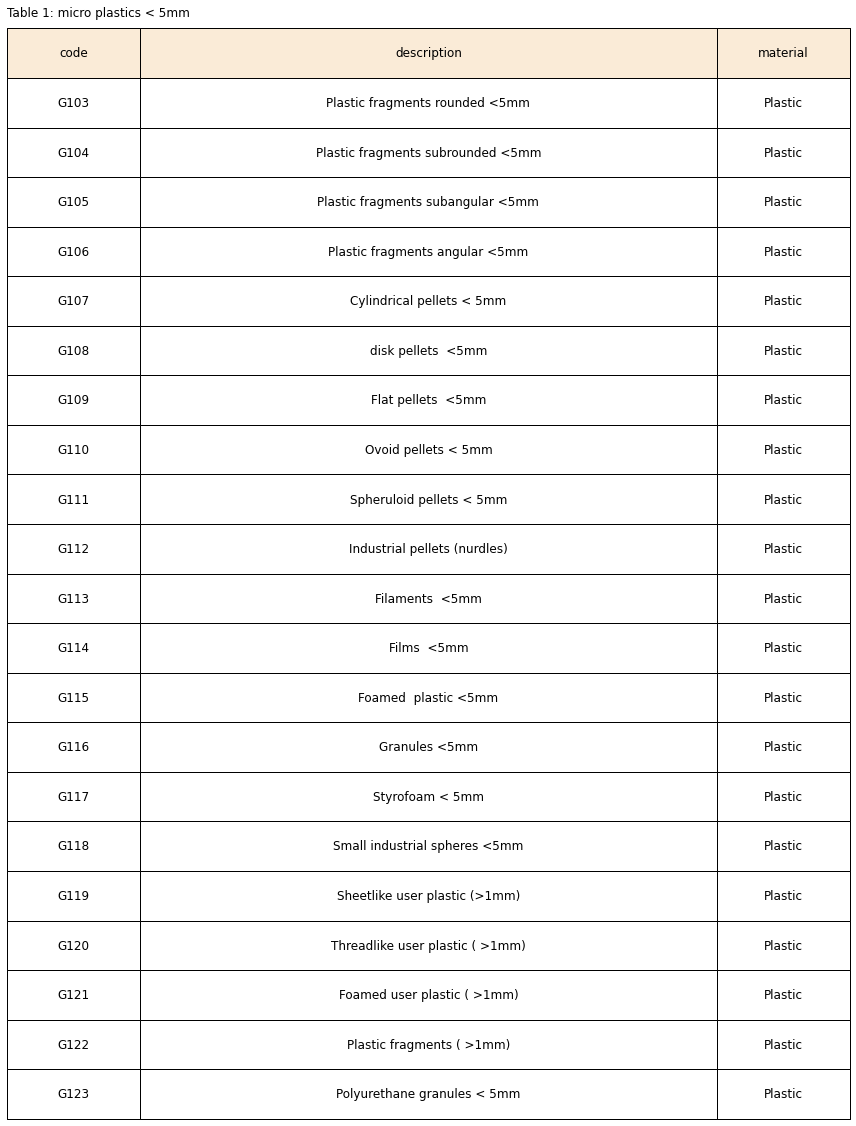

In [7]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(codesmicro)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: micro plastics < 5mm", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Micro codes are all micro plastics and foams"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Agriculture</span>
Use this list with construction, and const, ag and transport lists not ag2 nor construction2 lists. 
The agriculture codes are primarily codes that have been added over the course of this project and have been identified in our data.


In [8]:
ag=['G36',    
'G936',
'G937',
'G943']
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/ag.json", data=ag)
grouped = grouped + ag
# groups.append({"ag":ag})
groups.update({x:"ag" for x in ag})

putting: output/code_groups/ag.json


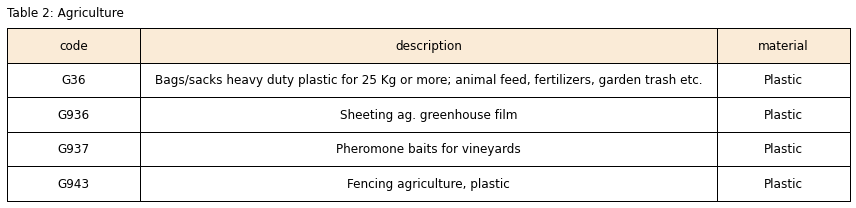

In [9]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(ag)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Agriculture", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items specific to agricultural industry"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Construction codes</span>
Use this list with ag, and const, ag and transport lists not ag2 nor construction2 lists.
This list includes items from the Marine Litter Watch Master list and additional codes created for this project.
The following items in the construction code list have not been identified in our data as of 31.01.2021: 
'G69', 'G72', 'G169', 'G189'.
Codes G909-G912 were created to differentiate foams used for insulation from packaging foams. The data is aggregated to parent codes G74, G81 and G82


In [10]:

construction=['G9',
              'G17',
              'G22',
              'G66',
              'G68',
              'G69',
              'G72',
              'G74',
              'G81',
              'G82',
              'G83',
              'G87',
              'G89',
              'G93',
              'G160',
              'G162',
              'G166',
              'G169',
              'G174',
              'G186',
              'G188',
              'G189',
              'G190',
              'G194',
              'G908',
              'G909',
              'G910',
              'G911',
              'G912',
              'G921',
              'G931']
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/construction.json", data=construction)
grouped = grouped + construction
groups.update({x:"cons" for x in construction})

putting: output/code_groups/construction.json


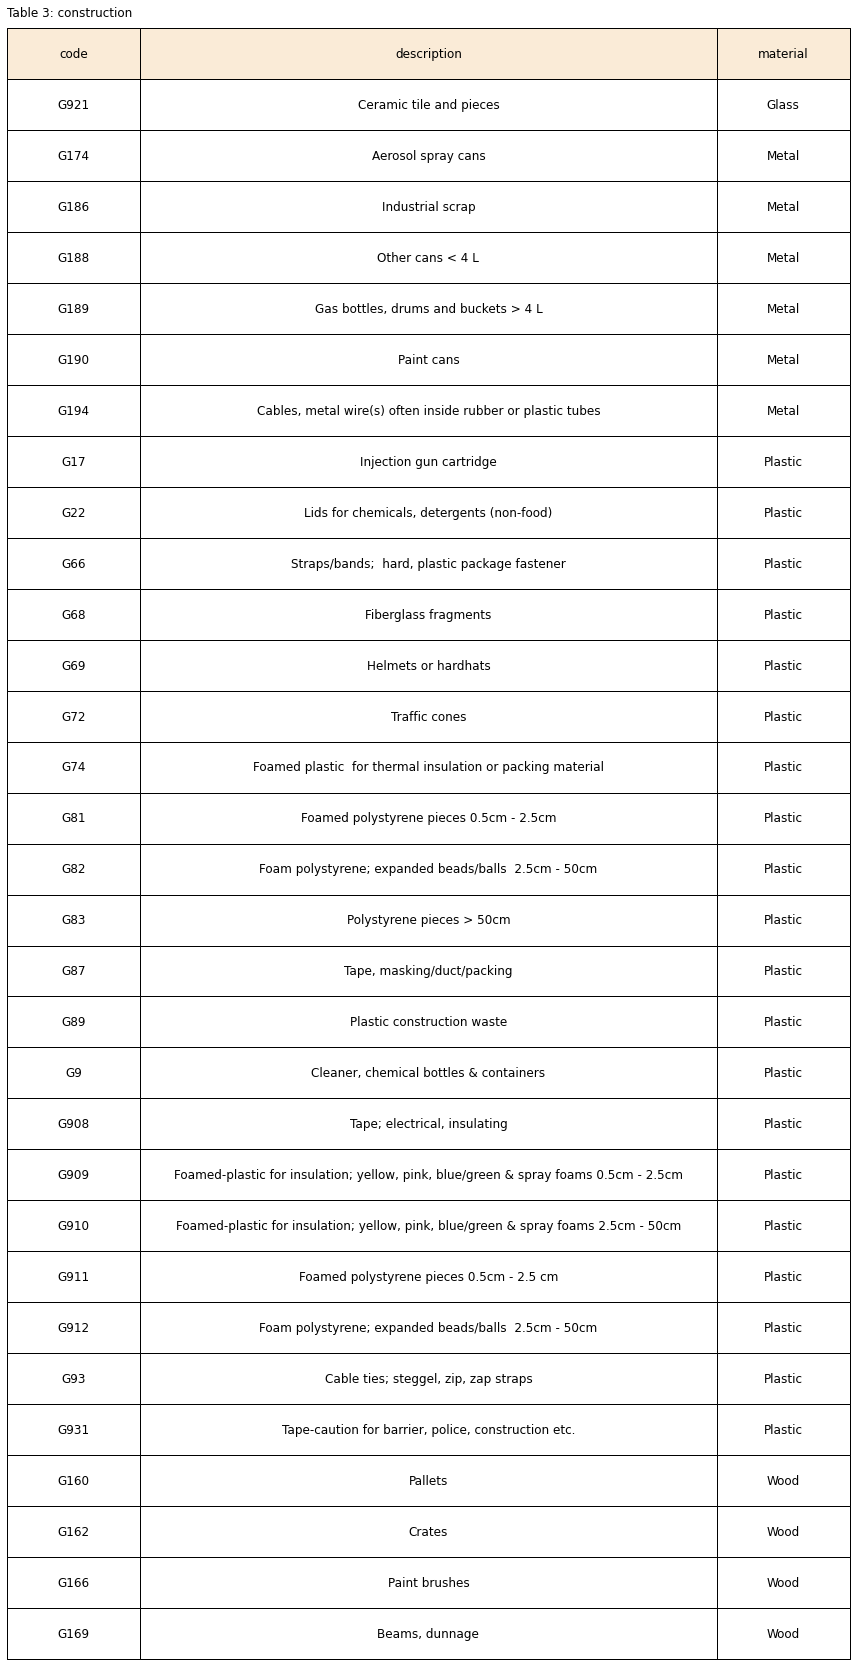

In [11]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(construction)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: construction", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items specific to construction industry"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Wastewater treatment codes</span>
Wastewater treatment codes includes items that may have been toilet flushed and released from a water treatment bypass or inadequate filtering for items such as cotton swabs. Note G98 includes diapers and wipes. Diapers are an exception in Swiss water systems the quantities should be attributed to personal hygiene wipes. 

In [12]:

wastewater = [
    'G91',
    'G95',
    'G96',
    'G98',
    'G97',
    'G100',
    'G133',
    'G932',
    'G144'
]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/wastewater.json", data=wastewater)
grouped = grouped + wastewater

groups.update({x:'waste_water' for x in wastewater})

putting: output/code_groups/wastewater.json


In [13]:
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

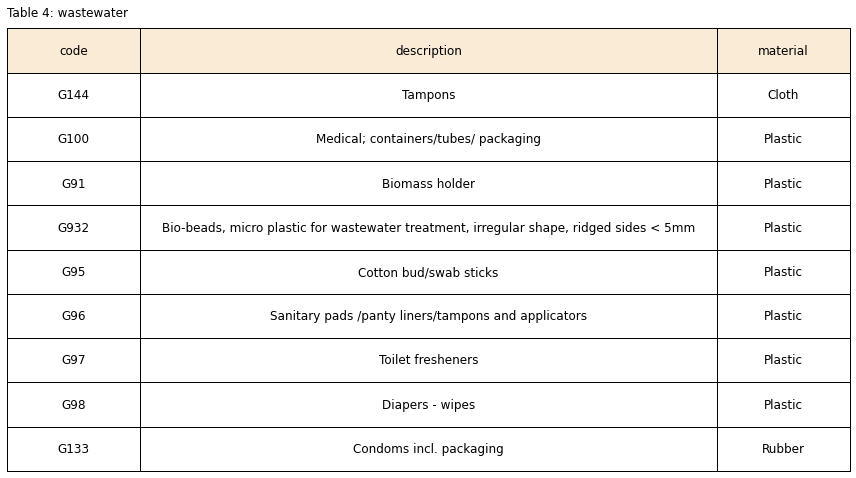

In [14]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: wastewater", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items specific to wastewater treatment"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Recreation codes</span>

Recreation codes includes fishing, hunting, boating and beach related items excluding food, drink and tobacco items from Annex 8.1 - Master List of Categories of Litter Items and additional codes that have been found in Swiss waterways. Not all codes have been identified in our data. Example G163 Crab/lobster pots

In [15]:
recreation = [
    'G32',
    'G42',
    'G43',
    'G44',
    'G45',
    'G46',
    'G47',
    'G48',
    'G49',
    'G50',
    'G49',
    'G51',
    'G52',
    'G53',
    'G54',
    'G53',
    'G55',
    'G56',
    'G57',
    'G58',
    'G59',
    'G60',
    'G61',
    'G62',
    'G63',
    'G70',
    'G73',
    'G86',
    'G92',
    'G94',
    'G206',
    'G207',
    'G132',
    'G142',
    'G143',
    'G155',
    'G163',
    'G164',
    'G167',
    'G182',
    'G183',
    'G184',
    'G125',
    'G126',
    'G11',
    'G29',
    'G213',
    'G904',
    'G940'
  ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/recreation.json", data=recreation)
grouped = grouped + recreation
# groups.append({"recre":recreation})
groups.update({x:'recre' for x in recreation})


putting: output/code_groups/recreation.json


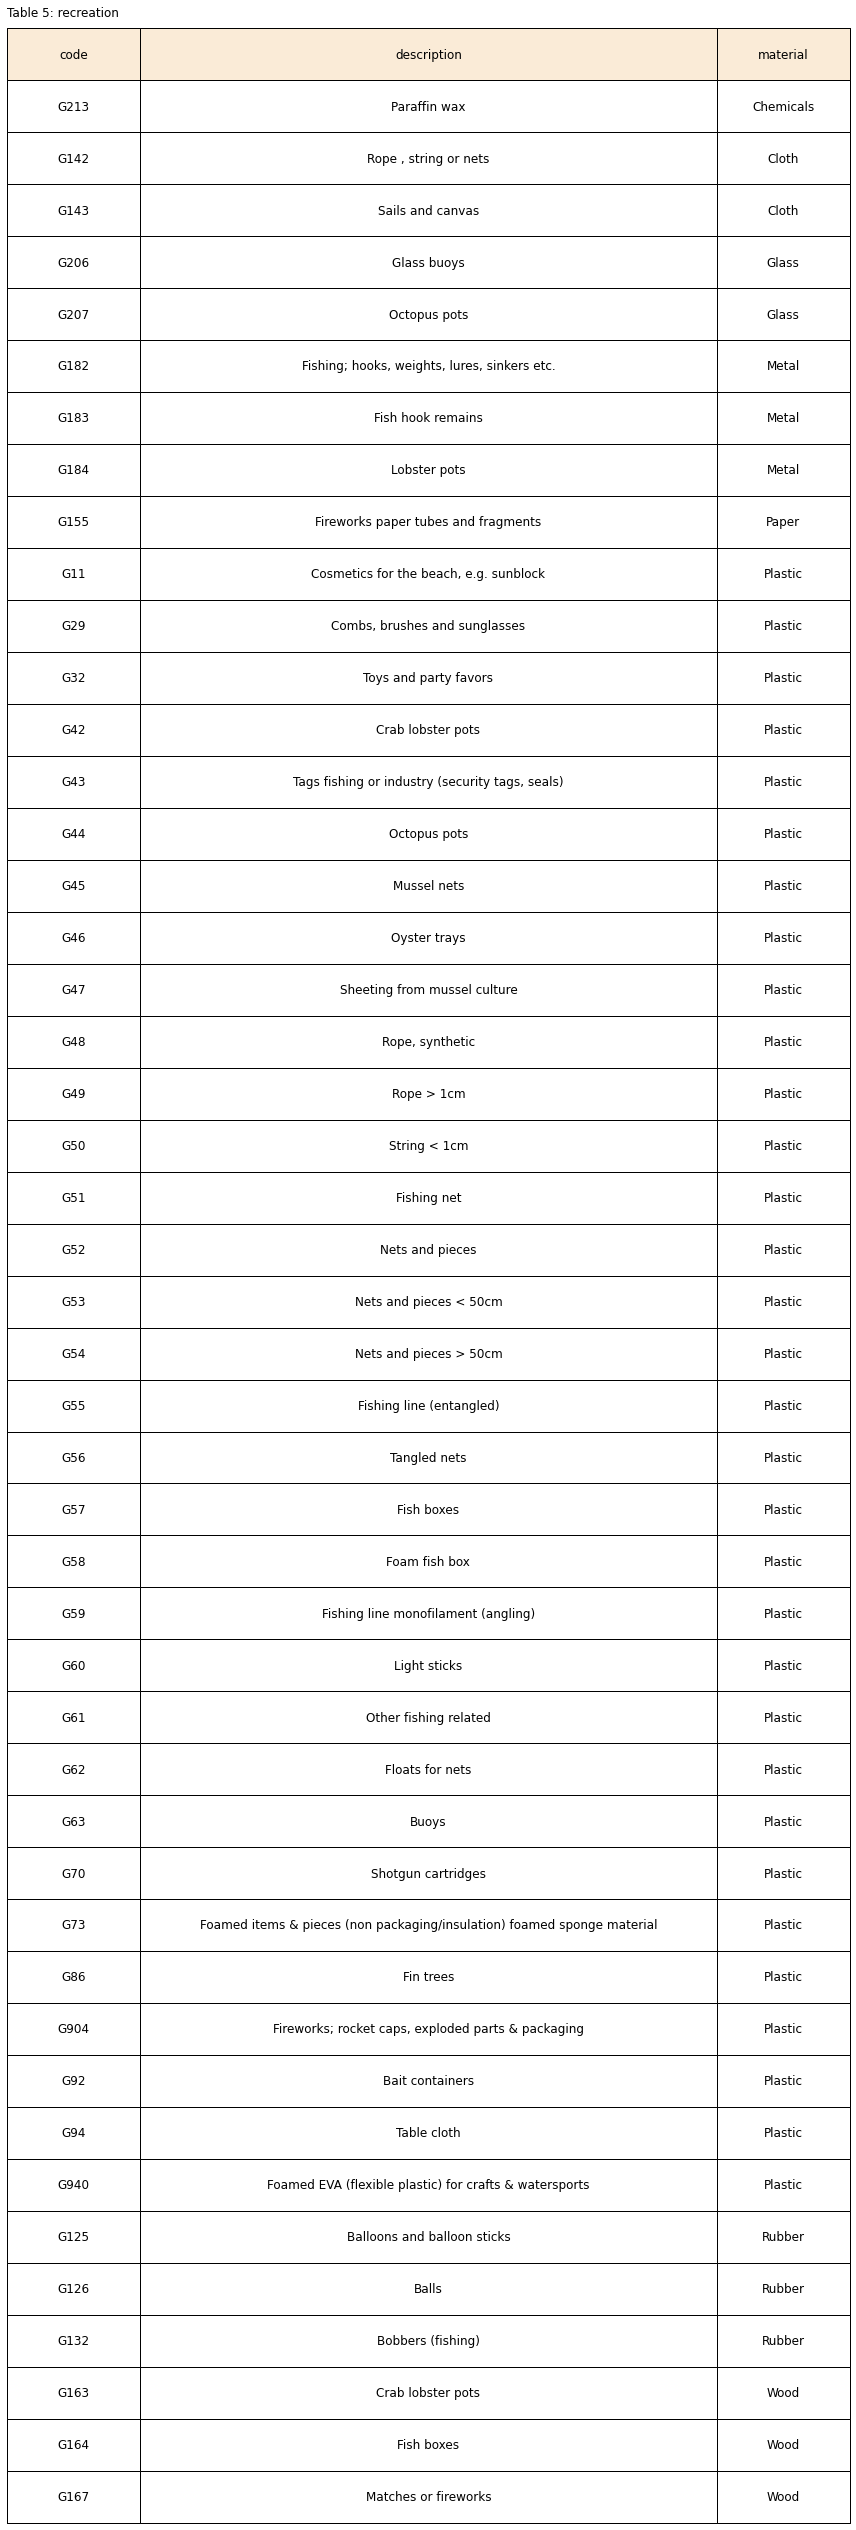

In [16]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(recreation)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: recreation", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Fishing, hunting, boating and beach related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Food and drink codes</span>

Food and drink codes includes consumable items related to picknicking from Annex 8.1 - Master List of Categories of Litter Items. 

In [17]:
foodstuff = [
    'G1',
    'G8',
    'G7',
    'G10',
    'G21',
    'G24',
    'G30',
    'G175',
    'G176',
    'G177',
    'G178',
    'G179',
    'G181',
    'G200',
    'G150',
    'G153',
    'G159',
    'G165',
    'G31',
    'G33',
    'G34',
    'G35',
    'G926',
    'G938'
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/foodstuff.json", data=foodstuff)
grouped = grouped + foodstuff
# groups.append({"food":foodstuff})
groups.update({x:"food" for x in foodstuff})

putting: output/code_groups/foodstuff.json


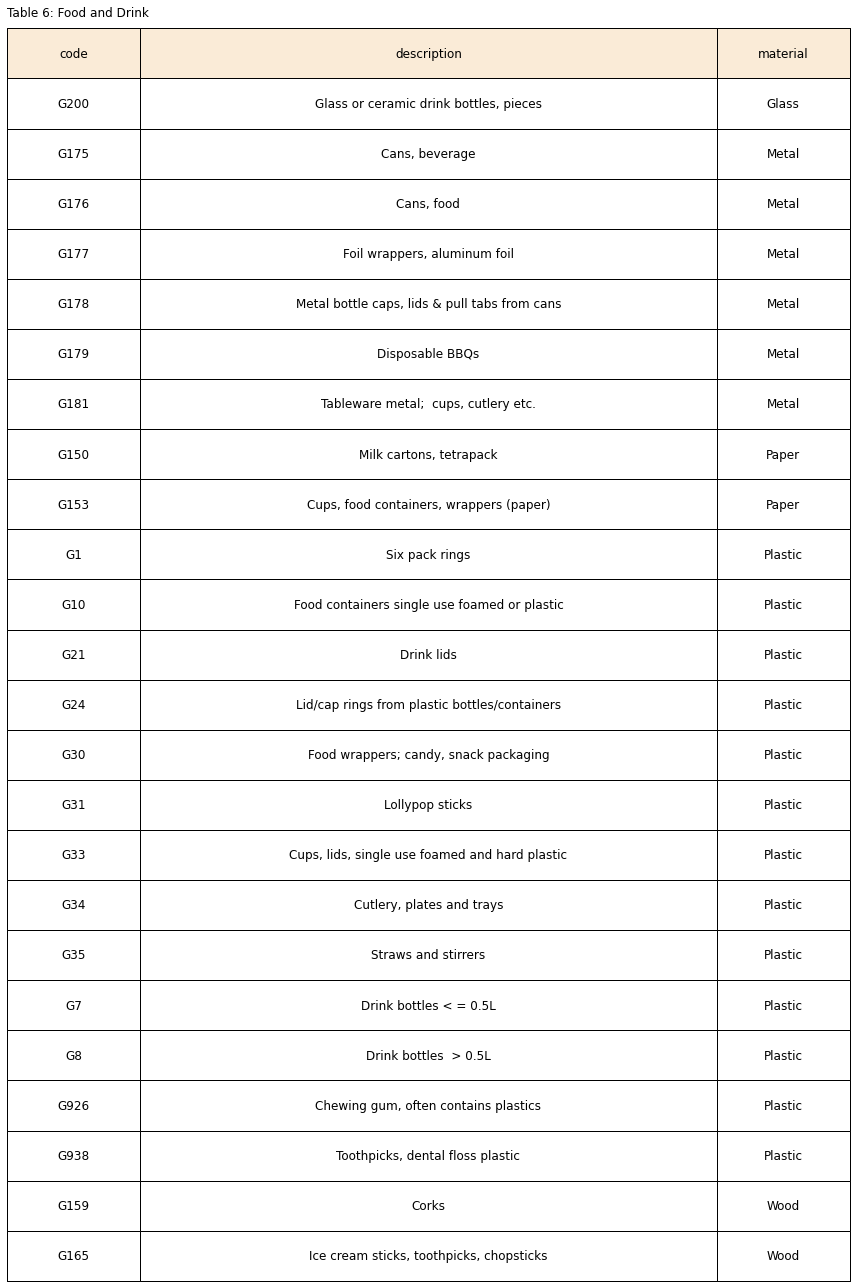

In [18]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(foodstuff)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Food and Drink", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Food and drink related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Construction, agriculture and transportation codes</span>

Construction, agriculture and transportation related items from Annex 8.1 - Master List of Categories of Litter Items and additional codes that have been found in Swiss waterways.

In [19]:
cat = [
    "G13",
    "G14",
    "G15",
    "G16", 
    "G18", 
    "G38", 
    "G41",
    "G65",
    "G67",
    "G161",
    "G168",
    "G170",
    "G171",
    "G172",
    "G187",
    "G191",
    "G192",
    "G204",
    "G919", 
    "G934"
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/cat.json", data=cat)
grouped = grouped + cat
# groups.append({"cat":cat})
groups.update({x:"cat" for x in cat})

putting: output/code_groups/cat.json


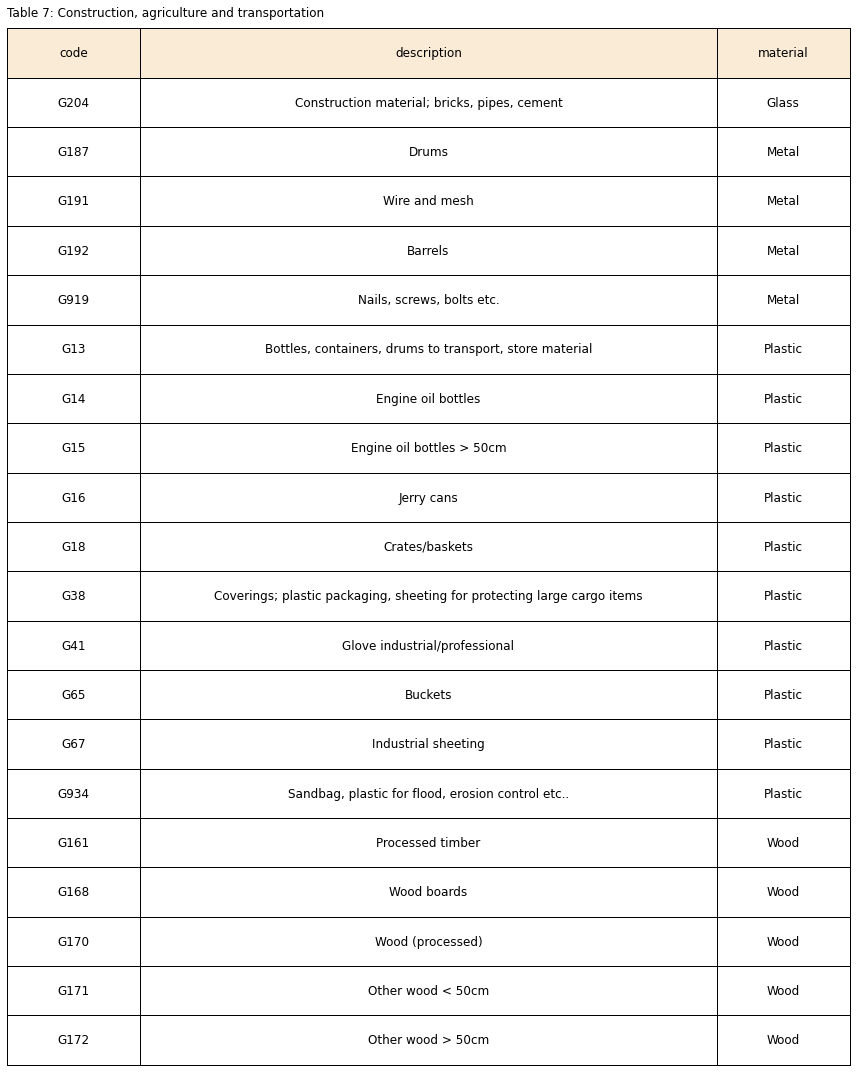

In [20]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(cat)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Construction, agriculture and transportation", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Construction, agriculture and transportation related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Agriculture2 Complete list codes</span>
USE AG2 LIST INSTEAD OF AG, AND CONSTRUCTION, AG AND TRANSPORTATION LISTS TO AVOID DUPLICATED ITEMS
Agriculture includes all items from ag list and common items from what is known as plasticulture or "ag plastics" from Annex 8.1 - Master List of Categories of Litter Items and additional codes that have been identified in Swiss waterways.

In [21]:
ag2 = ["G36",
    "G936",
    "G937",
    "G943"
    "G13",
    "G14",
    "G15",
    "G16", 
    "G18", 
    "G38", 
    "G41",
    "G65",
    "G67",
    "G161",
    "G168",
    "G170",
    "G171",
    "G172",
    "G191",
    "G192",
    "G934"]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/ag2.json", data=ag2)
grouped = grouped + ag2
# groups.append({"ag2":ag2})
groups.update({x:"ag2" for x in ag2})

putting: output/code_groups/ag2.json


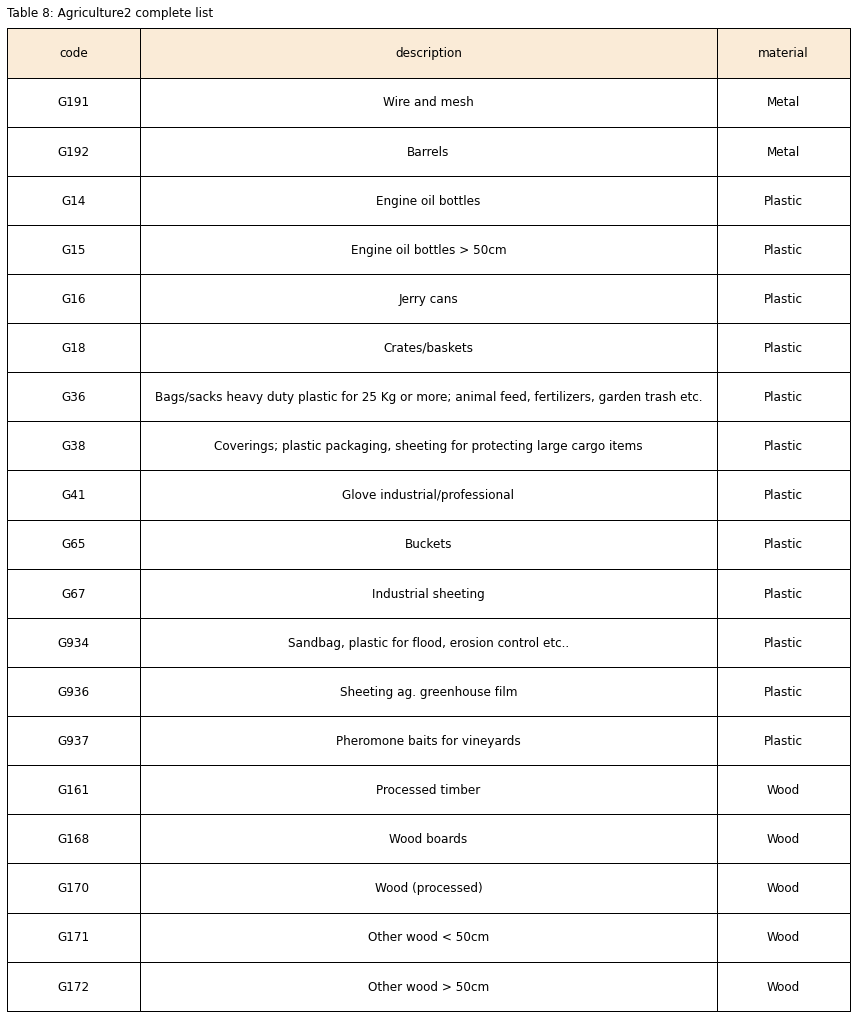

In [22]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(ag2)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Agriculture2 complete list", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Agriculture2 complete list"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Construction2 codes</span>
Use this with ag2 group and not ag and const, ag and transport groups.
This list includes items from the Marine Litter Watch Master list and additional codes created for this project.
The following items in the construction code list have not been identified in our data as of 31.01.2021: 
'G69', 'G72', 'G169', 'G189'.
Codes G909-G912 were created to differentiate foams used for insulation from packaging foams. The data is aggregated to parent codes G74, G81 and G82


In [23]:

construction2= ['G9',
                'G204',
                'G187',
                'G919',
                'G65',
                'G17',
                'G22',
                'G66',
                'G68',
                'G69',
              'G72',
              'G74',
              'G81',
              'G82',
              'G83',
              'G87',
              'G89',
              'G93',
              'G160',
              'G162',
              'G166',
              'G169',
              'G174',
              'G186',
              'G188',
              'G189',
              'G190',
              'G194',
              'G908',
              'G909',
              'G910',
              'G911',
              'G912',
              'G921',
              'G931']
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/construction2.json", data=construction2)
grouped = grouped + construction2
groups.update({x:"construction2" for x in construction2})

putting: output/code_groups/construction2.json


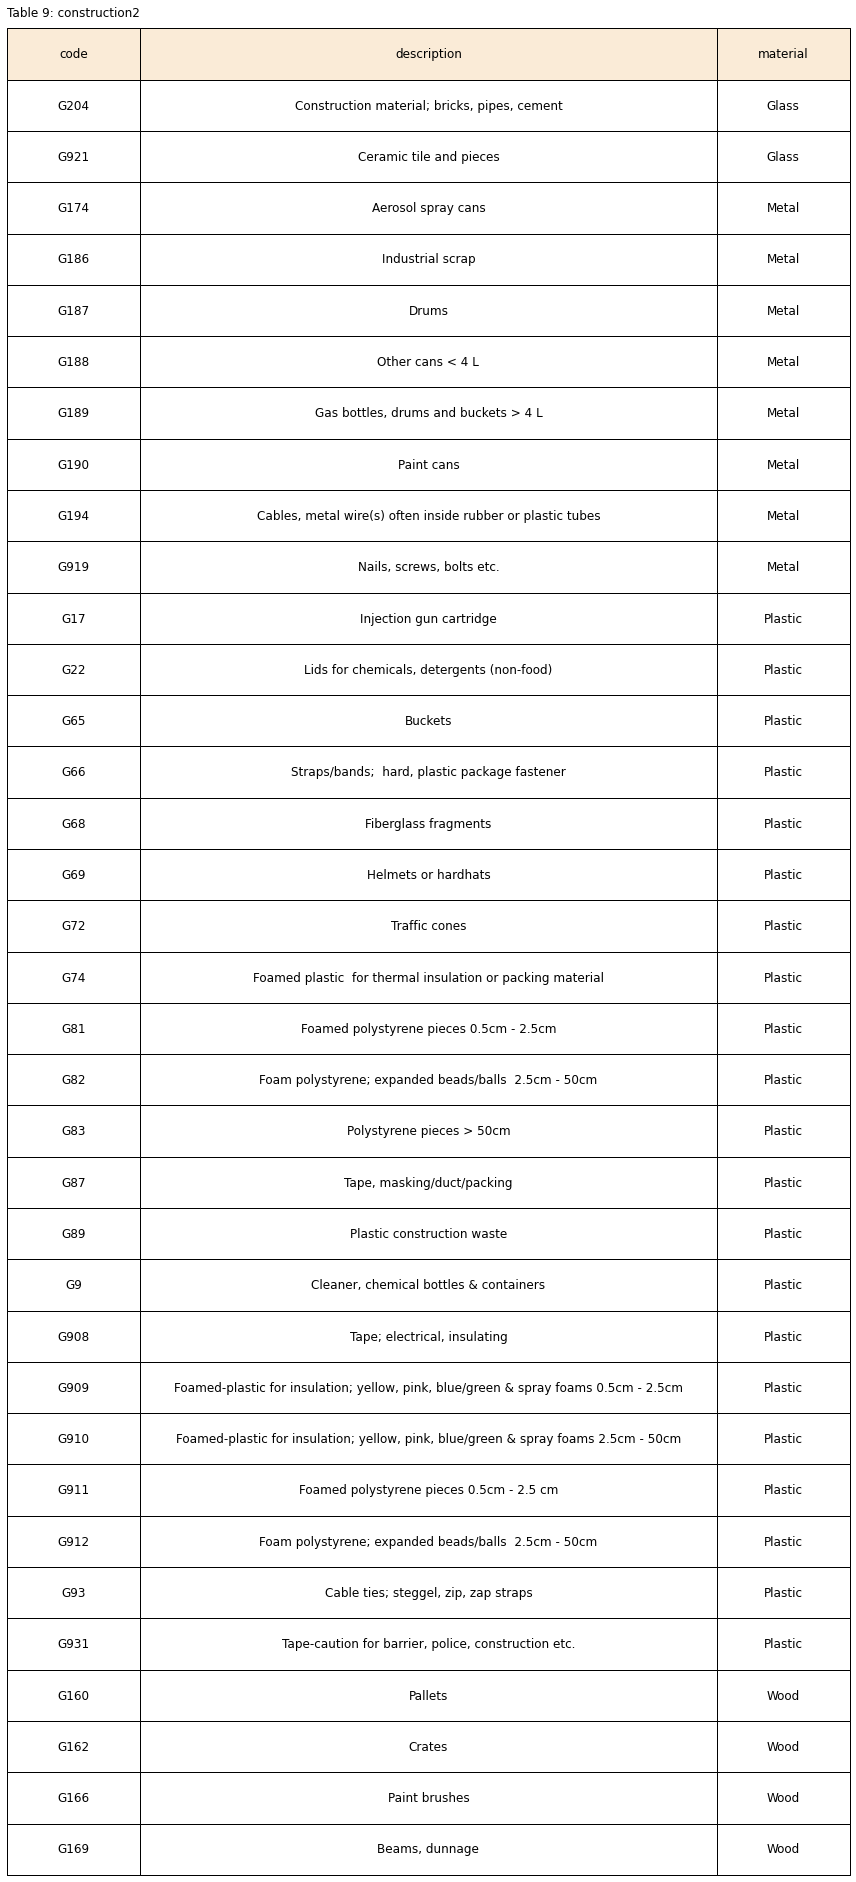

In [24]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(construction2)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: construction2", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items related to construction industry"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Tobacco codes</span>

Tobacco related items from Annex 8.1 - Master List of Categories of Litter Items.

In [25]:
tobac = [
    'G25',
    'G26',
    'G27',
    'G152'
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/tobac.json", data=tobac)
grouped = grouped + tobac

groups.update({x:"tobaco" for x in tobac})

putting: output/code_groups/tobac.json


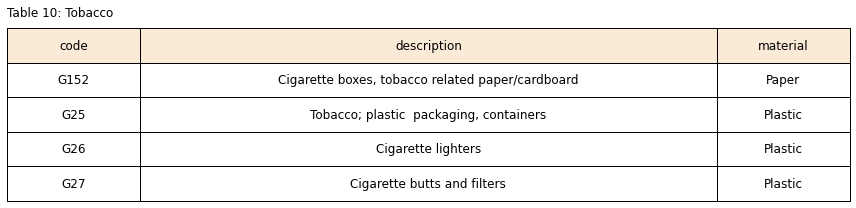

In [26]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(tobac)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Tobacco", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Tobacco related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Personal Items</span>

Personal effects likely left on site or close proximity Annex 8.1 - Master List of Categories of Litter and added Swiss waterway items.

In [27]:
pi = [
    'G211',
    'G84',
    'G99',
    'G101',
    'G102',
    'G131',
    'G135',
    'G136',
    'G138',
    'G139',
    'G28',
    'G154',
    'G195',
    'G900',
    'G901',
    'G902',
    'G903',
    'G905',
    'G906',
    'G907',
    'G913',
    'G914',
    'G915',
    'G918',
    'G916',
    'G933',
    'G929',
    'G945',
    'G923',
    'G12',
    'G71',
    'G88',
    'G935',
    'G930'
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/pi.json", data=pi)
grouped = grouped + pi
# groups.append({"pi":pi})
groups.update({x:"pi" for x in pi})


putting: output/code_groups/pi.json


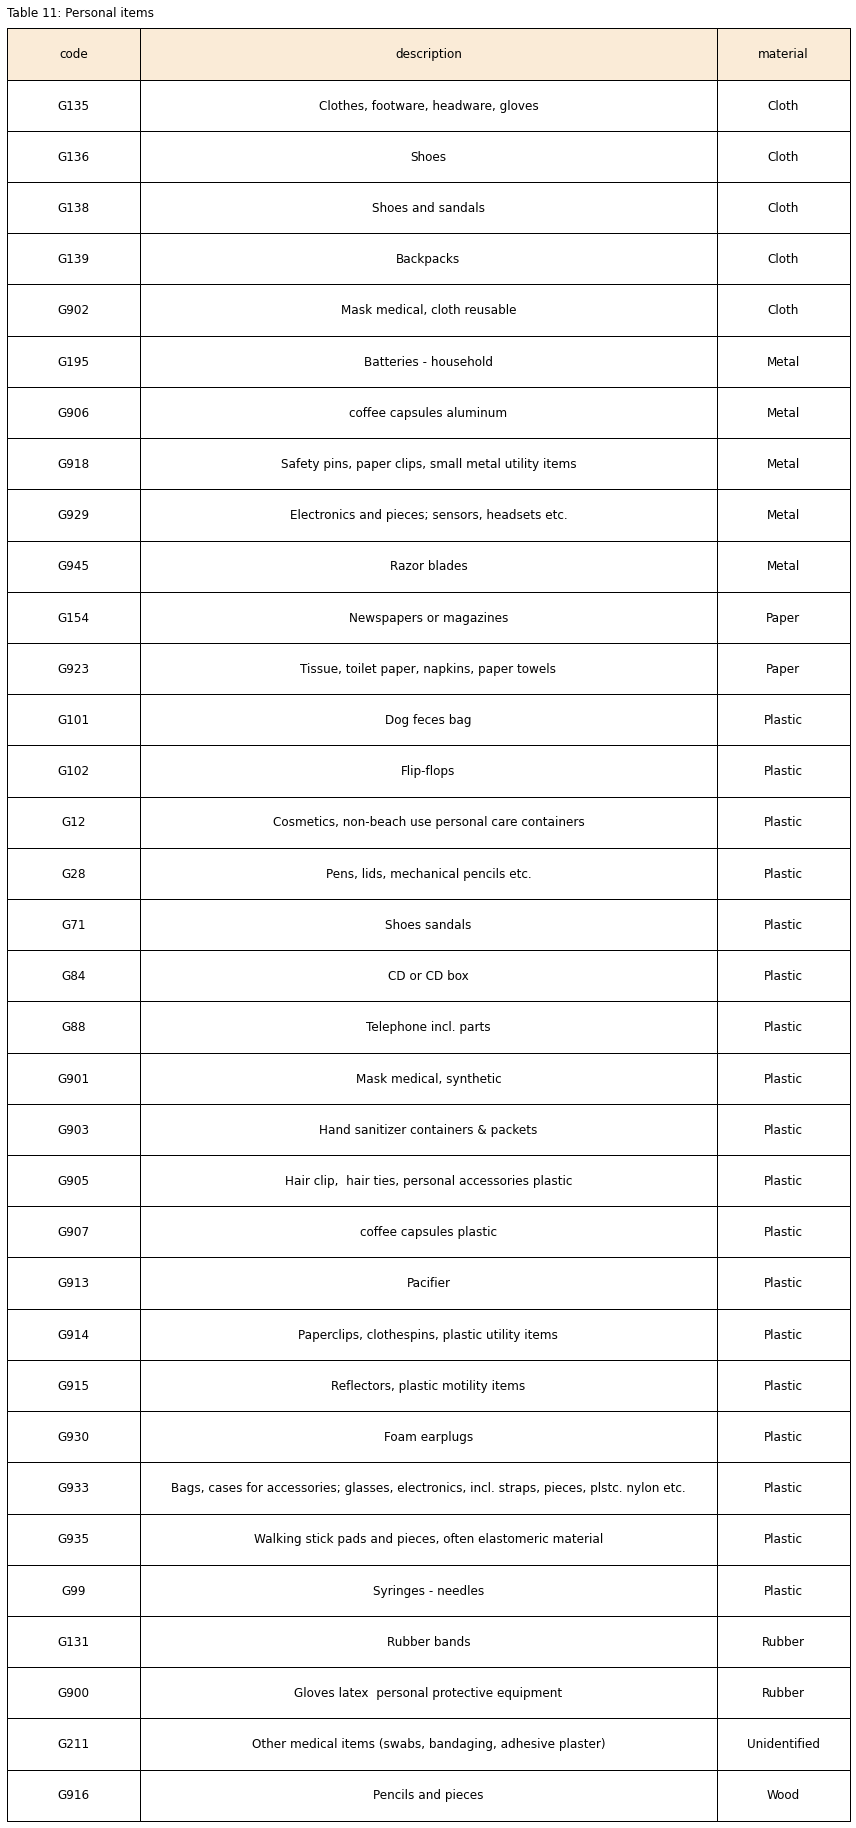

In [28]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(pi)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Personal items", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Personal use related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Packaging non food or unknown origin</span>

Packaging non-food related Annex 8.1 - Master List of Categories of Litter and added Swiss waterway items.

In [29]:
packaging = [
    "G23",
    "G2",
    "G151",
    "G146", 
    "G149", 
    "G3", 
    "G20",
    "G4",
    "G6",
    "G147",
    "G922",
    "G941",
    "G925",
    "G5"
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/packaging.json", data=packaging)
grouped = grouped + packaging
# groups.append({"packaging":packaging})
groups.update({x:"packaging" for x in packaging})

putting: output/code_groups/packaging.json


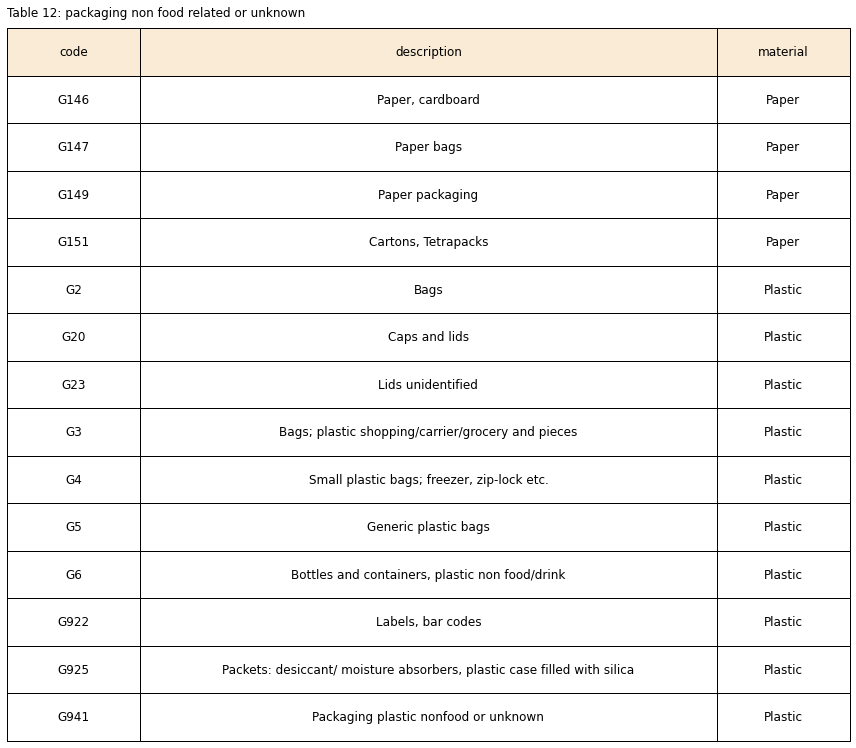

In [30]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(packaging)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: packaging non food related or unknown", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Packaging related items not identified as food, drink or tobacco"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Plastic and foam pieces of unknown origin</span>

Plastic and foam pieces of unknown use or origin Annex 8.1 - Master List of Categories of Litter and added Swiss waterway items.

In [31]:
plasticpcs = [
    "G78",
    "G79",
    "G80",
    "G75", 
    "G76", 
    "77" 
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/plasticpcs.json", data=plasticpcs)
grouped = grouped + plasticpcs
# groups.append({"plasticpcs":plasticpcs})
groups.update({x:"plasticpcs" for x in plasticpcs})

putting: output/code_groups/plasticpcs.json


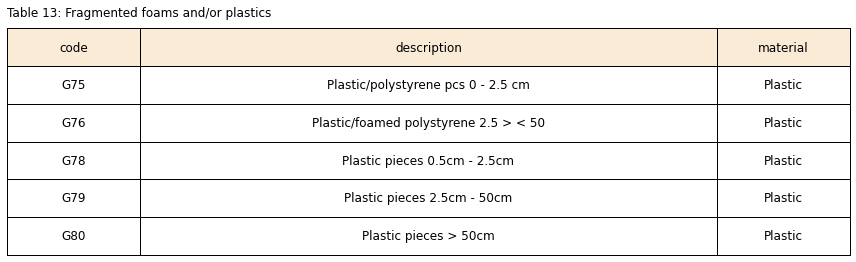

In [32]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(plasticpcs)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Fragmented foams and/or plastics", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Plastic fragments of unknown use of origin"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

In [33]:
### <span style="color:#008891">Recreation codes</span>
print("\ncodes grouped:\n")
print(grouped)
print("\ncodes not grouped:\n")
print(dfCodes[~dfCodes.code.isin(grouped)].code.values)
print("\ncodes not grouped abrev list:\n")


codes grouped:

['G112', 'G106', 'G117', 'G103', 'G104', 'G105', 'G107', 'G108', 'G109', 'G110', 'G111', 'G113', 'G114', 'G115', 'G116', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G36', 'G936', 'G937', 'G943', 'G9', 'G17', 'G22', 'G66', 'G68', 'G69', 'G72', 'G74', 'G81', 'G82', 'G83', 'G87', 'G89', 'G93', 'G160', 'G162', 'G166', 'G169', 'G174', 'G186', 'G188', 'G189', 'G190', 'G194', 'G908', 'G909', 'G910', 'G911', 'G912', 'G921', 'G931', 'G91', 'G95', 'G96', 'G98', 'G97', 'G100', 'G133', 'G932', 'G144', 'G32', 'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G50', 'G49', 'G51', 'G52', 'G53', 'G54', 'G53', 'G55', 'G56', 'G57', 'G58', 'G59', 'G60', 'G61', 'G62', 'G63', 'G70', 'G73', 'G86', 'G92', 'G94', 'G206', 'G207', 'G132', 'G142', 'G143', 'G155', 'G163', 'G164', 'G167', 'G182', 'G183', 'G184', 'G125', 'G126', 'G11', 'G29', 'G213', 'G904', 'G940', 'G1', 'G8', 'G7', 'G10', 'G21', 'G24', 'G30', 'G175', 'G176', 'G177', 'G178', 'G179', 'G181', 'G200', 'G150', 'G153', 'G159

In [34]:
ng=dfCodes[~dfCodes.code.isin(grouped)]

figname = F"workinglist.csv"
filename=F"{output}/code_groups/{figname}"
ng.to_csv(filename, index=None) 

In [35]:
g124=ng[ng.code == "G124"]
g124

,code,material,description,source,source_two,source_three,parent_code,direct,single_use,micro,ospar_code
101,G124,Plastic,Other plastic or foam products,Undefined,Where does it come from,NaN,Parent code,True,False,False,NaN


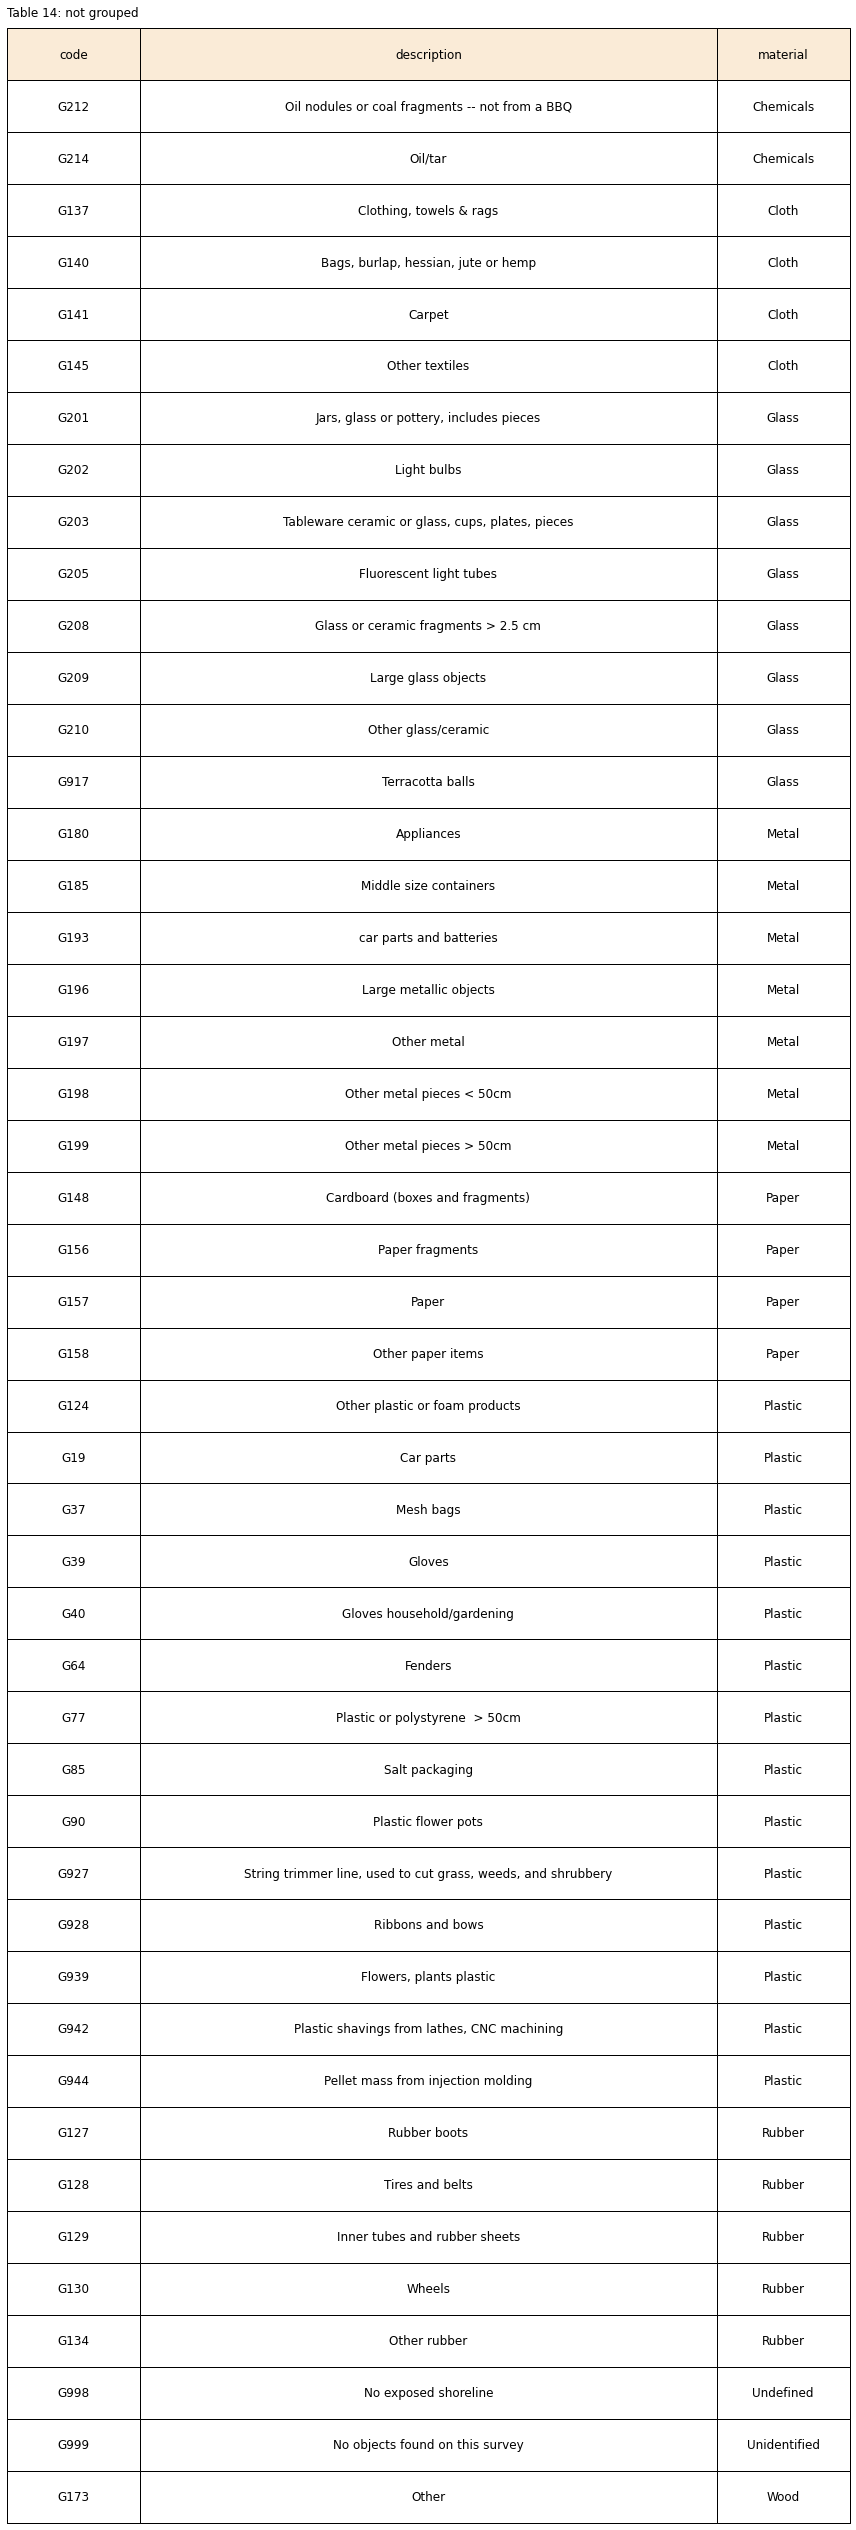

In [36]:
# make adjustments to table kwargs:
wwcodes = ng[['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: not grouped", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Ungrouped items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:blue">Codes no id</span>

In [37]:

hmm = dfSurveys.copy()
hmm = hmm[["code","quantity"]].groupby("code", as_index=False).quantity.sum()

found = hmm.code.unique()

ahh=[code for code in dfCodes.code if code not in found]


# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/codeNotfound.json", data=ahh)

# construction codes that have not been identified
[code for code in construction if code in ahh]

putting: output/code_groups/codeNotfound.json


['G69', 'G72', 'G169', 'G189']

In [38]:
dfCodes['source_two'] = 'unk'

def assgin_a_group(x,groups):
    try:
        send = groups[x]
    except:
        send = 'unk'
    return send
    
    
for group in groups:
    dfCodes['source_two'] = dfCodes.code.map(lambda x: assgin_a_group(x,groups))
dfCodes.groupby('source_two').code.count()

source_two
ag                1
ag2              18
cat               1
construction2    35
food             24
micro            21
packaging        14
pi               34
plasticpcs        5
recre            47
tobaco            4
unk              47
waste_water       9
Name: code, dtype: int64

#### Hopefully that just worked for you

if not contact shannon@hammerdirt.ch

In [39]:
dfCodes[dfCodes.source_two == 'cons']
figname = F"codes_with_groups.csv"
filename=F"{output}/code_groups/{figname}"
dfCodes.to_csv(filename, index=None) 